In [14]:
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
#import seaborn
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier

from IPython.display import display
%matplotlib inline
pd.options.display.max_rows = 10
pd.options.display.max_columns = 100

In [15]:
## Load the data
### Has had some preprocessing already, plus new features added from other datasets

In [16]:
violations_df = pd.read_csv('violations_all.csv', index_col=0)
display(violations_df)

,crit_violations,non_crit_violations,earliest_inspection,latest_inspection,second_latest_inspection,zipcode,boro,cuisine,address,num_inspections,crit_violations_recent_inspect,non_crit_violations_recent_inspect,crit_violations_train,non_crit_violations_train,num_inspections_train,average_crit_v_train,average_non_crit_v_train,time_since_last_inspection,time_since_first_inspection,crit_v_2plus,3-day temp,3-day humidity,crit_vs_sec_last_insp,prior_2p_crit_insps,rating,rating_null,rating_null_zip,food_poisoning_complaints,food_establishment_complaints,electric_complaints,safety_complaints,rodent_complaints,dirty_conditions_complaints,general_complaints,missed_collection_complaints,police_matter_complaints,liq_license,side_license
30075445,8.0,4.0,2013-08-14,2016-02-18,2015-02-09,10462,BRONX,Bakery,1007 MORRIS PARK AVE,5,1,1,7.0,3.0,4,1.750,0.750000,374,918,0,39.333333,60.666667,1,2,4.800000,0,0,2,5,3,1,24.0,24.0,6.0,20.0,3,True,False
30112340,14.0,10.0,2014-06-05,2016-10-27,2016-10-03,11225,BROOKLYN,Hamburgers,469 FLATBUSH AVENUE,9,1,1,13.0,9.0,8,1.625,1.125000,24,875,0,47.000000,58.000000,3,4,3.400000,0,0,5,7,23,3,27.0,18.0,15.0,4.0,0,True,False
30191841,4.0,7.0,2013-07-22,2016-05-31,2015-09-21,10019,MANHATTAN,Irish,351 WEST 57 STREET,5,1,1,3.0,6.0,4,0.750,1.500000,253,1044,0,77.333333,68.666667,1,0,3.500000,0,0,16,13,172,72,32.0,33.0,104.0,26.0,11,True,True
40356018,1.0,7.0,2013-06-05,2016-05-16,2015-06-05,11224,BROOKLYN,American,2780 STILLWELL AVENUE,4,1,1,0.0,6.0,3,0.000,2.000000,346,1076,0,58.333333,56.666667,0,0,4.800000,0,0,0,9,24,4,13.0,8.0,9.0,3.0,3,True,False
40356151,13.0,5.0,2014-04-11,2016-05-14,2015-05-29,11369,QUEENS,American,8825 ASTORIA BOULEVARD,7,1,1,12.0,4.0,6,2.000,0.666667,351,764,0,63.666667,67.666667,1,4,3.800000,0,0,0,3,6,0,8.0,12.0,4.0,20.0,2,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50060427,10.0,4.0,2017-03-07,2017-04-06,2017-03-20,11217,BROOKLYN,Bagels/Pretzels,73 LAFAYETTE AVE,3,2,1,8.0,3.0,2,4.000,1.500000,17,30,1,49.333333,88.666667,5,2,4.100000,0,0,3,14,14,2,83.0,31.0,13.0,13.0,4,True,True
50060496,7.0,4.0,2017-02-27,2017-03-31,2017-02-27,11232,BROOKLYN,Delicatessen,4102 3RD AVE,2,3,1,4.0,3.0,1,4.000,3.000000,32,32,1,46.000000,67.333333,4,1,4.800000,0,0,0,1,9,4,4.0,32.0,8.0,3.0,2,False,False
50060695,7.0,4.0,2017-04-04,2017-04-10,2017-04-04,11432,QUEENS,Pizza,16417 JAMAICA AVE,2,1,1,6.0,3.0,1,6.000,3.000000,6,6,0,51.333333,55.000000,0,0,3.792806,1,0,0,0,0,0,1.0,4.0,0.0,3.0,0,False,False
50060807,2.0,2.0,2017-03-09,2017-03-20,2017-03-09,10467,BRONX,Chinese,2861 WHITE PLAINS RD,2,1,2,1.0,0.0,1,1.000,0.000000,11,11,0,42.000000,47.333333,1,0,3.700000,0,0,3,5,55,14,62.0,24.0,28.0,9.0,14,True,False


## Drop columns that we know we don't want during training

In [17]:
violations_df.columns

Index(['crit_violations', 'non_crit_violations', 'earliest_inspection',
       'latest_inspection', 'second_latest_inspection', 'zipcode', 'boro',
       'cuisine', 'address', 'num_inspections',
       'crit_violations_recent_inspect', 'non_crit_violations_recent_inspect',
       'crit_violations_train', 'non_crit_violations_train',
       'num_inspections_train', 'average_crit_v_train',
       'average_non_crit_v_train', 'time_since_last_inspection',
       'time_since_first_inspection', 'crit_v_2plus', '3-day temp',
       '3-day humidity', 'crit_vs_sec_last_insp', 'prior_2p_crit_insps',
       'rating', 'rating_null', 'rating_null_zip', 'food_poisoning_complaints',
       'food_establishment_complaints', 'electric_complaints',
       'safety_complaints', 'rodent_complaints', 'dirty_conditions_complaints',
       'general_complaints', 'missed_collection_complaints',
       'police_matter_complaints', 'liq_license', 'side_license'],
      dtype='object')

In [18]:
violations_df2 = violations_df.drop(['address', 'crit_violations', 'earliest_inspection',
                                     'latest_inspection', 'second_latest_inspection',
                                     'non_crit_violations', 'num_inspections',
                                     'crit_violations_recent_inspect', 'non_crit_violations_recent_inspect'], axis=1)
display(violations_df2)

,zipcode,boro,cuisine,crit_violations_train,non_crit_violations_train,num_inspections_train,average_crit_v_train,average_non_crit_v_train,time_since_last_inspection,time_since_first_inspection,crit_v_2plus,3-day temp,3-day humidity,crit_vs_sec_last_insp,prior_2p_crit_insps,rating,rating_null,rating_null_zip,food_poisoning_complaints,food_establishment_complaints,electric_complaints,safety_complaints,rodent_complaints,dirty_conditions_complaints,general_complaints,missed_collection_complaints,police_matter_complaints,liq_license,side_license
30075445,10462,BRONX,Bakery,7.0,3.0,4,1.750,0.750000,374,918,0,39.333333,60.666667,1,2,4.800000,0,0,2,5,3,1,24.0,24.0,6.0,20.0,3,True,False
30112340,11225,BROOKLYN,Hamburgers,13.0,9.0,8,1.625,1.125000,24,875,0,47.000000,58.000000,3,4,3.400000,0,0,5,7,23,3,27.0,18.0,15.0,4.0,0,True,False
30191841,10019,MANHATTAN,Irish,3.0,6.0,4,0.750,1.500000,253,1044,0,77.333333,68.666667,1,0,3.500000,0,0,16,13,172,72,32.0,33.0,104.0,26.0,11,True,True
40356018,11224,BROOKLYN,American,0.0,6.0,3,0.000,2.000000,346,1076,0,58.333333,56.666667,0,0,4.800000,0,0,0,9,24,4,13.0,8.0,9.0,3.0,3,True,False
40356151,11369,QUEENS,American,12.0,4.0,6,2.000,0.666667,351,764,0,63.666667,67.666667,1,4,3.800000,0,0,0,3,6,0,8.0,12.0,4.0,20.0,2,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50060427,11217,BROOKLYN,Bagels/Pretzels,8.0,3.0,2,4.000,1.500000,17,30,1,49.333333,88.666667,5,2,4.100000,0,0,3,14,14,2,83.0,31.0,13.0,13.0,4,True,True
50060496,11232,BROOKLYN,Delicatessen,4.0,3.0,1,4.000,3.000000,32,32,1,46.000000,67.333333,4,1,4.800000,0,0,0,1,9,4,4.0,32.0,8.0,3.0,2,False,False
50060695,11432,QUEENS,Pizza,6.0,3.0,1,6.000,3.000000,6,6,0,51.333333,55.000000,0,0,3.792806,1,0,0,0,0,0,1.0,4.0,0.0,3.0,0,False,False
50060807,10467,BRONX,Chinese,1.0,0.0,1,1.000,0.000000,11,11,0,42.000000,47.333333,1,0,3.700000,0,0,3,5,55,14,62.0,24.0,28.0,9.0,14,True,False


## What features do we have currently?

In [19]:
print(list(violations_df2.columns.values))

['zipcode', 'boro', 'cuisine', 'crit_violations_train', 'non_crit_violations_train', 'num_inspections_train', 'average_crit_v_train', 'average_non_crit_v_train', 'time_since_last_inspection', 'time_since_first_inspection', 'crit_v_2plus', '3-day temp', '3-day humidity', 'crit_vs_sec_last_insp', 'prior_2p_crit_insps', 'rating', 'rating_null', 'rating_null_zip', 'food_poisoning_complaints', 'food_establishment_complaints', 'electric_complaints', 'safety_complaints', 'rodent_complaints', 'dirty_conditions_complaints', 'general_complaints', 'missed_collection_complaints', 'police_matter_complaints', 'liq_license', 'side_license']


## Encode categorical features

In [20]:
categorical = ['zipcode', 'boro', 'cuisine']
violations_df3 = pd.get_dummies(violations_df2, columns=categorical, drop_first=True)

## Split into train/test and separate target variable

In [21]:
X = violations_df3.drop(['crit_v_2plus'],axis=1)
y = violations_df3['crit_v_2plus']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
display(X_train.head())
display(X_test.head())

,crit_violations_train,non_crit_violations_train,num_inspections_train,average_crit_v_train,average_non_crit_v_train,time_since_last_inspection,time_since_first_inspection,3-day temp,3-day humidity,crit_vs_sec_last_insp,prior_2p_crit_insps,rating,rating_null,rating_null_zip,food_poisoning_complaints,food_establishment_complaints,electric_complaints,safety_complaints,rodent_complaints,dirty_conditions_complaints,general_complaints,missed_collection_complaints,police_matter_complaints,liq_license,side_license,zipcode_10002,zipcode_10003,zipcode_10004,zipcode_10005,zipcode_10006,zipcode_10007,zipcode_10009,zipcode_10010,zipcode_10011,zipcode_10012,zipcode_10013,zipcode_10014,zipcode_10016,zipcode_10017,zipcode_10018,zipcode_10019,zipcode_10020,zipcode_10021,zipcode_10022,zipcode_10023,zipcode_10024,zipcode_10025,zipcode_10026,zipcode_10027,zipcode_10028,...,cuisine_German,cuisine_Greek,cuisine_Hamburgers,cuisine_Hawaiian,cuisine_Hotdogs,cuisine_Hotdogs/Pretzels,"cuisine_Ice Cream, Gelato, Yogurt, Ices",cuisine_Indian,cuisine_Indonesian,cuisine_Iranian,cuisine_Irish,cuisine_Italian,cuisine_Japanese,cuisine_Jewish/Kosher,"cuisine_Juice, Smoothies, Fruit Salads",cuisine_Korean,"cuisine_Latin (Cuban, Dominican, Puerto Rican, South & Central American)",cuisine_Mediterranean,cuisine_Mexican,cuisine_Middle Eastern,cuisine_Moroccan,cuisine_Not Listed/Not Applicable,cuisine_Nuts/Confectionary,cuisine_Other,cuisine_Pakistani,cuisine_Pancakes/Waffles,cuisine_Peruvian,cuisine_Pizza,cuisine_Pizza/Italian,cuisine_Polish,cuisine_Polynesian,cuisine_Portuguese,cuisine_Russian,cuisine_Salads,cuisine_Sandwiches,cuisine_Sandwiches/Salads/Mixed Buffet,cuisine_Scandinavian,cuisine_Seafood,cuisine_Soul Food,cuisine_Soups,cuisine_Soups & Sandwiches,cuisine_Southwestern,cuisine_Spanish,cuisine_Steak,cuisine_Tapas,cuisine_Tex-Mex,cuisine_Thai,cuisine_Turkish,cuisine_Vegetarian,cuisine_Vietnamese/Cambodian/Malaysia
41370373,16.0,7.0,8,2.000000,0.875000,40,1070,38.666667,53.333333,2,5,3.9,0,0,0,0,1,0,4.0,5.0,0.0,15.0,2,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
40762853,30.0,22.0,13,2.307692,1.692308,32,1064,46.000000,58.333333,8,8,4.1,0,0,17,76,16,5,35.0,42.0,20.0,17.0,17,True,False,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41678386,19.0,12.0,8,2.375000,1.500000,33,942,44.666667,59.333333,2,5,4.5,0,0,2,3,85,24,20.0,9.0,77.0,3.0,6,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
40394054,26.0,15.0,11,2.363636,1.363636,61,965,37.000000,68.666667,1,9,3.8,0,0,7,6,10,6,6.0,17.0,16.0,23.0,6,True,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50046451,3.0,1.0,1,3.000000,1.000000,25,25,83.000000,53.666667,3,1,5.0,0,0,4,0,35,18,28.0,22.0,15.0,10.0,7,True,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


,crit_violations_train,non_crit_violations_train,num_inspections_train,average_crit_v_train,average_non_crit_v_train,time_since_last_inspection,time_since_first_inspection,3-day temp,3-day humidity,crit_vs_sec_last_insp,prior_2p_crit_insps,rating,rating_null,rating_null_zip,food_poisoning_complaints,food_establishment_complaints,electric_complaints,safety_complaints,rodent_complaints,dirty_conditions_complaints,general_complaints,missed_collection_complaints,police_matter_complaints,liq_license,side_license,zipcode_10002,zipcode_10003,zipcode_10004,zipcode_10005,zipcode_10006,zipcode_10007,zipcode_10009,zipcode_10010,zipcode_10011,zipcode_10012,zipcode_10013,zipcode_10014,zipcode_10016,zipcode_10017,zipcode_10018,zipcode_10019,zipcode_10020,zipcode_10021,zipcode_10022,zipcode_10023,zipcode_10024,zipcode_10025,zipcode_10026,zipcode_10027,zipcode_10028,...,cuisine_German,cuisine_Greek,cuisine_Hamburgers,cuisine_Hawaiian,cuisine_Hotdogs,cuisine_Hotdogs/Pretzels,"cuisine_Ice Cream, Gelato, Yogurt, Ices",cuisine_Indian,cuisine_Indonesian,cuisine_Iranian,cuisine_Irish,cuisine_Italian,cuisine_Japanese,cuisine_Jewish/Kosher,"cuisine_Juice, Smoothies, Fruit Salads",cuisine_Korean,"cuisine_Latin (Cuban, Dominican, Puerto Rican, South & Central American)",cuisine_Mediterranean,cuisine_Mexican,cuisine_Middle Eastern,cuisine_Moroccan,cuisine_Not Listed/Not Applicable,cuisine_Nuts/Confectionary,cuisine_Other,cuisine_Pakistani,cuisine_Pancakes/Waffles,cuisine_Peruvian,cuisine_Pizza,cuisine_Pizza/Italian,cuisine_Polish,cuisine_Polynesian,cuisine_Portuguese,cuisine_Russian,cuisine_Salads,cuisine_Sandwiches,cuisine_Sandwiches/Salads/Mixed Buffet,cuisine_Scandinavian,cuisine_Seafood,cuisine_Soul Food,cuisine_Soups,cuisine_Soups & Sandwiches,cuisine_Southwestern,cuisine_Spanish,cuisine_Steak,cuisine_Tapas,cuisine_Tex-Mex,cuisine_Thai,cuisine_Turkish,cuisine_Vegetarian,cuisine_Vietnamese/Cambodian/Malaysia
41367409,15.0,10.0,9,1.666667,1.111111,200,1070,83.000000,53.666667,1,3,3.3,0,0,0,57,90,14,35.0,24.0,105.0,6.0,9,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50004838,15.0,5.0,9,1.666667,0.555556,219,1057,49.333333,75.333333,3,4,3.2,0,0,3,9,50,7,54.0,34.0,39.0,14.0,6,True,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41305419,7.0,9.0,7,1.000000,1.285714,199,890,38.333333,56.666667,1,2,4.2,0,0,0,0,1,1,17.0,15.0,2.0,10.0,5,True,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41540508,0.0,3.0,2,0.000000,1.500000,378,721,29.666667,55.000000,0,0,2.3,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50005098,2.0,5.0,3,0.666667,1.666667,405,1089,43.666667,88.666667,1,0,3.8,0,0,10,53,21,5,77.0,42.0,26.0,16.0,20,True,True,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Normalize numerical features to [0,1]

In [22]:
def feature_normalization(train, test): # From first Machine Learning homework assignment
    """Rescale the data so that each feature in the training set is in
    the interval [0,1], and apply the same transformations to the test
    set, using the statistics computed on the training set.

    Args:
        train - training set, a 2D numpy array of size (num_instances, num_features)
        test  - test set, a 2D numpy array of size (num_instances, num_features)
    Returns:
        train_normalized - training set after normalization
        test_normalized  - test set after normalization

    """
    #m = np.min(train,axis=0)
    m = train.min(axis=0)
    #M = np.max(train,axis=0)
    M = train.max(axis=0)
    train_normalized = (train - m)/(M-m)
    test_normalized = (test - m)/(M-m)
    return train_normalized, test_normalized

numeric = ['crit_violations_train', 'non_crit_violations_train', 'num_inspections_train',
           'average_crit_v_train', 'average_non_crit_v_train', 'crit_vs_sec_last_insp', 'prior_2p_crit_insps',
           'time_since_last_inspection', 'time_since_first_inspection',
           '3-day temp', '3-day humidity', 'rating','food_poisoning_complaints',
       'food_establishment_complaints', 'electric_complaints',
       'safety_complaints', 'rodent_complaints', 'dirty_conditions_complaints',
       'general_complaints', 'missed_collection_complaints',
       'police_matter_complaints']

# TODO: Deal with lat/long more intelligently
train_normalized, test_normalized = feature_normalization(X_train.loc[:,numeric], X_test.loc[:,numeric])

X_train_norm = X_train.copy(deep=True)
X_test_norm = X_test.copy(deep=True)

X_train_norm.loc[:,numeric] = train_normalized
X_test_norm.loc[:,numeric] = test_normalized

display(X_train_norm.head())
display(X_test_norm.head())

,crit_violations_train,non_crit_violations_train,num_inspections_train,average_crit_v_train,average_non_crit_v_train,time_since_last_inspection,time_since_first_inspection,3-day temp,3-day humidity,crit_vs_sec_last_insp,prior_2p_crit_insps,rating,rating_null,rating_null_zip,food_poisoning_complaints,food_establishment_complaints,electric_complaints,safety_complaints,rodent_complaints,dirty_conditions_complaints,general_complaints,missed_collection_complaints,police_matter_complaints,liq_license,side_license,zipcode_10002,zipcode_10003,zipcode_10004,zipcode_10005,zipcode_10006,zipcode_10007,zipcode_10009,zipcode_10010,zipcode_10011,zipcode_10012,zipcode_10013,zipcode_10014,zipcode_10016,zipcode_10017,zipcode_10018,zipcode_10019,zipcode_10020,zipcode_10021,zipcode_10022,zipcode_10023,zipcode_10024,zipcode_10025,zipcode_10026,zipcode_10027,zipcode_10028,...,cuisine_German,cuisine_Greek,cuisine_Hamburgers,cuisine_Hawaiian,cuisine_Hotdogs,cuisine_Hotdogs/Pretzels,"cuisine_Ice Cream, Gelato, Yogurt, Ices",cuisine_Indian,cuisine_Indonesian,cuisine_Iranian,cuisine_Irish,cuisine_Italian,cuisine_Japanese,cuisine_Jewish/Kosher,"cuisine_Juice, Smoothies, Fruit Salads",cuisine_Korean,"cuisine_Latin (Cuban, Dominican, Puerto Rican, South & Central American)",cuisine_Mediterranean,cuisine_Mexican,cuisine_Middle Eastern,cuisine_Moroccan,cuisine_Not Listed/Not Applicable,cuisine_Nuts/Confectionary,cuisine_Other,cuisine_Pakistani,cuisine_Pancakes/Waffles,cuisine_Peruvian,cuisine_Pizza,cuisine_Pizza/Italian,cuisine_Polish,cuisine_Polynesian,cuisine_Portuguese,cuisine_Russian,cuisine_Salads,cuisine_Sandwiches,cuisine_Sandwiches/Salads/Mixed Buffet,cuisine_Scandinavian,cuisine_Seafood,cuisine_Soul Food,cuisine_Soups,cuisine_Soups & Sandwiches,cuisine_Southwestern,cuisine_Spanish,cuisine_Steak,cuisine_Tapas,cuisine_Tex-Mex,cuisine_Thai,cuisine_Turkish,cuisine_Vegetarian,cuisine_Vietnamese/Cambodian/Malaysia
41370373,0.271186,0.233333,0.388889,0.285714,0.145833,0.036449,0.977127,0.266990,0.398964,0.181818,0.3125,0.725,0,0,0.000000,0.000000,0.002070,0.000000,0.017241,0.016447,0.000000,0.086705,0.004535,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
40762853,0.508475,0.733333,0.666667,0.329670,0.282051,0.028972,0.971638,0.373786,0.476684,0.727273,0.5000,0.775,0,0,0.447368,0.817204,0.033126,0.064935,0.150862,0.138158,0.041841,0.098266,0.038549,True,False,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41678386,0.322034,0.400000,0.388889,0.339286,0.250000,0.029907,0.860018,0.354369,0.492228,0.181818,0.3125,0.875,0,0,0.052632,0.032258,0.175983,0.311688,0.086207,0.029605,0.161088,0.017341,0.013605,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
40394054,0.440678,0.500000,0.555556,0.337662,0.227273,0.056075,0.881061,0.242718,0.637306,0.090909,0.5625,0.700,0,0,0.184211,0.064516,0.020704,0.077922,0.025862,0.055921,0.033473,0.132948,0.013605,True,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50046451,0.050847,0.033333,0.000000,0.428571,0.166667,0.022430,0.021043,0.912621,0.404145,0.272727,0.0625,1.000,0,0,0.105263,0.000000,0.072464,0.233766,0.120690,0.072368,0.031381,0.057803,0.015873,True,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


,crit_violations_train,non_crit_violations_train,num_inspections_train,average_crit_v_train,average_non_crit_v_train,time_since_last_inspection,time_since_first_inspection,3-day temp,3-day humidity,crit_vs_sec_last_insp,prior_2p_crit_insps,rating,rating_null,rating_null_zip,food_poisoning_complaints,food_establishment_complaints,electric_complaints,safety_complaints,rodent_complaints,dirty_conditions_complaints,general_complaints,missed_collection_complaints,police_matter_complaints,liq_license,side_license,zipcode_10002,zipcode_10003,zipcode_10004,zipcode_10005,zipcode_10006,zipcode_10007,zipcode_10009,zipcode_10010,zipcode_10011,zipcode_10012,zipcode_10013,zipcode_10014,zipcode_10016,zipcode_10017,zipcode_10018,zipcode_10019,zipcode_10020,zipcode_10021,zipcode_10022,zipcode_10023,zipcode_10024,zipcode_10025,zipcode_10026,zipcode_10027,zipcode_10028,...,cuisine_German,cuisine_Greek,cuisine_Hamburgers,cuisine_Hawaiian,cuisine_Hotdogs,cuisine_Hotdogs/Pretzels,"cuisine_Ice Cream, Gelato, Yogurt, Ices",cuisine_Indian,cuisine_Indonesian,cuisine_Iranian,cuisine_Irish,cuisine_Italian,cuisine_Japanese,cuisine_Jewish/Kosher,"cuisine_Juice, Smoothies, Fruit Salads",cuisine_Korean,"cuisine_Latin (Cuban, Dominican, Puerto Rican, South & Central American)",cuisine_Mediterranean,cuisine_Mexican,cuisine_Middle Eastern,cuisine_Moroccan,cuisine_Not Listed/Not Applicable,cuisine_Nuts/Confectionary,cuisine_Other,cuisine_Pakistani,cuisine_Pancakes/Waffles,cuisine_Peruvian,cuisine_Pizza,cuisine_Pizza/Italian,cuisine_Polish,cuisine_Polynesian,cuisine_Portuguese,cuisine_Russian,cuisine_Salads,cuisine_Sandwiches,cuisine_Sandwiches/Salads/Mixed Buffet,cuisine_Scandinavian,cuisine_Seafood,cuisine_Soul Food,cuisine_Soups,cuisine_Soups & Sandwiches,cuisine_Southwestern,cuisine_Spanish,cuisine_Steak,cuisine_Tapas,cuisine_Tex-Mex,cuisine_Thai,cuisine_Turkish,cuisine_Vegetarian,cuisine_Vietnamese/Cambodian/Malaysia
41367409,0.254237,0.333333,0.444444,0.238095,0.185185,0.185981,0.977127,0.912621,0.404145,0.090909,0.1875,0.575,0,0,0.000000,0.612903,0.186335,0.181818,0.150862,0.078947,0.219665,0.034682,0.020408,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50004838,0.254237,0.166667,0.444444,0.238095,0.092593,0.203738,0.965233,0.422330,0.740933,0.272727,0.2500,0.550,0,0,0.078947,0.096774,0.103520,0.090909,0.232759,0.111842,0.081590,0.080925,0.013605,True,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41305419,0.118644,0.300000,0.333333,0.142857,0.214286,0.185047,0.812443,0.262136,0.450777,0.090909,0.1250,0.800,0,0,0.000000,0.000000,0.002070,0.012987,0.073276,0.049342,0.004184,0.057803,0.011338,True,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41540508,0.000000,0.100000,0.055556,0.000000,0.250000,0.352336,0.657823,0.135922,0.424870,0.000000,0.0000,0.325,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002268,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50005098,0.033898,0.166667,0.111111,0.095238,0.277778,0.377570,0.994511,0.339806,0.948187,0.090909,0.0000,0.700,0,0,0.263158,0.569892,0.043478,0.064935,0.331897,0.138158,0.054393,0.092486,0.045351,True,True,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
from sklearn.tree import DecisionTreeClassifier

label = 'churndep'

tree = DecisionTreeClassifier(criterion="entropy")
tree.fit(X_train_norm,y_train )

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

/Users/motorrecoveryresearchlab/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


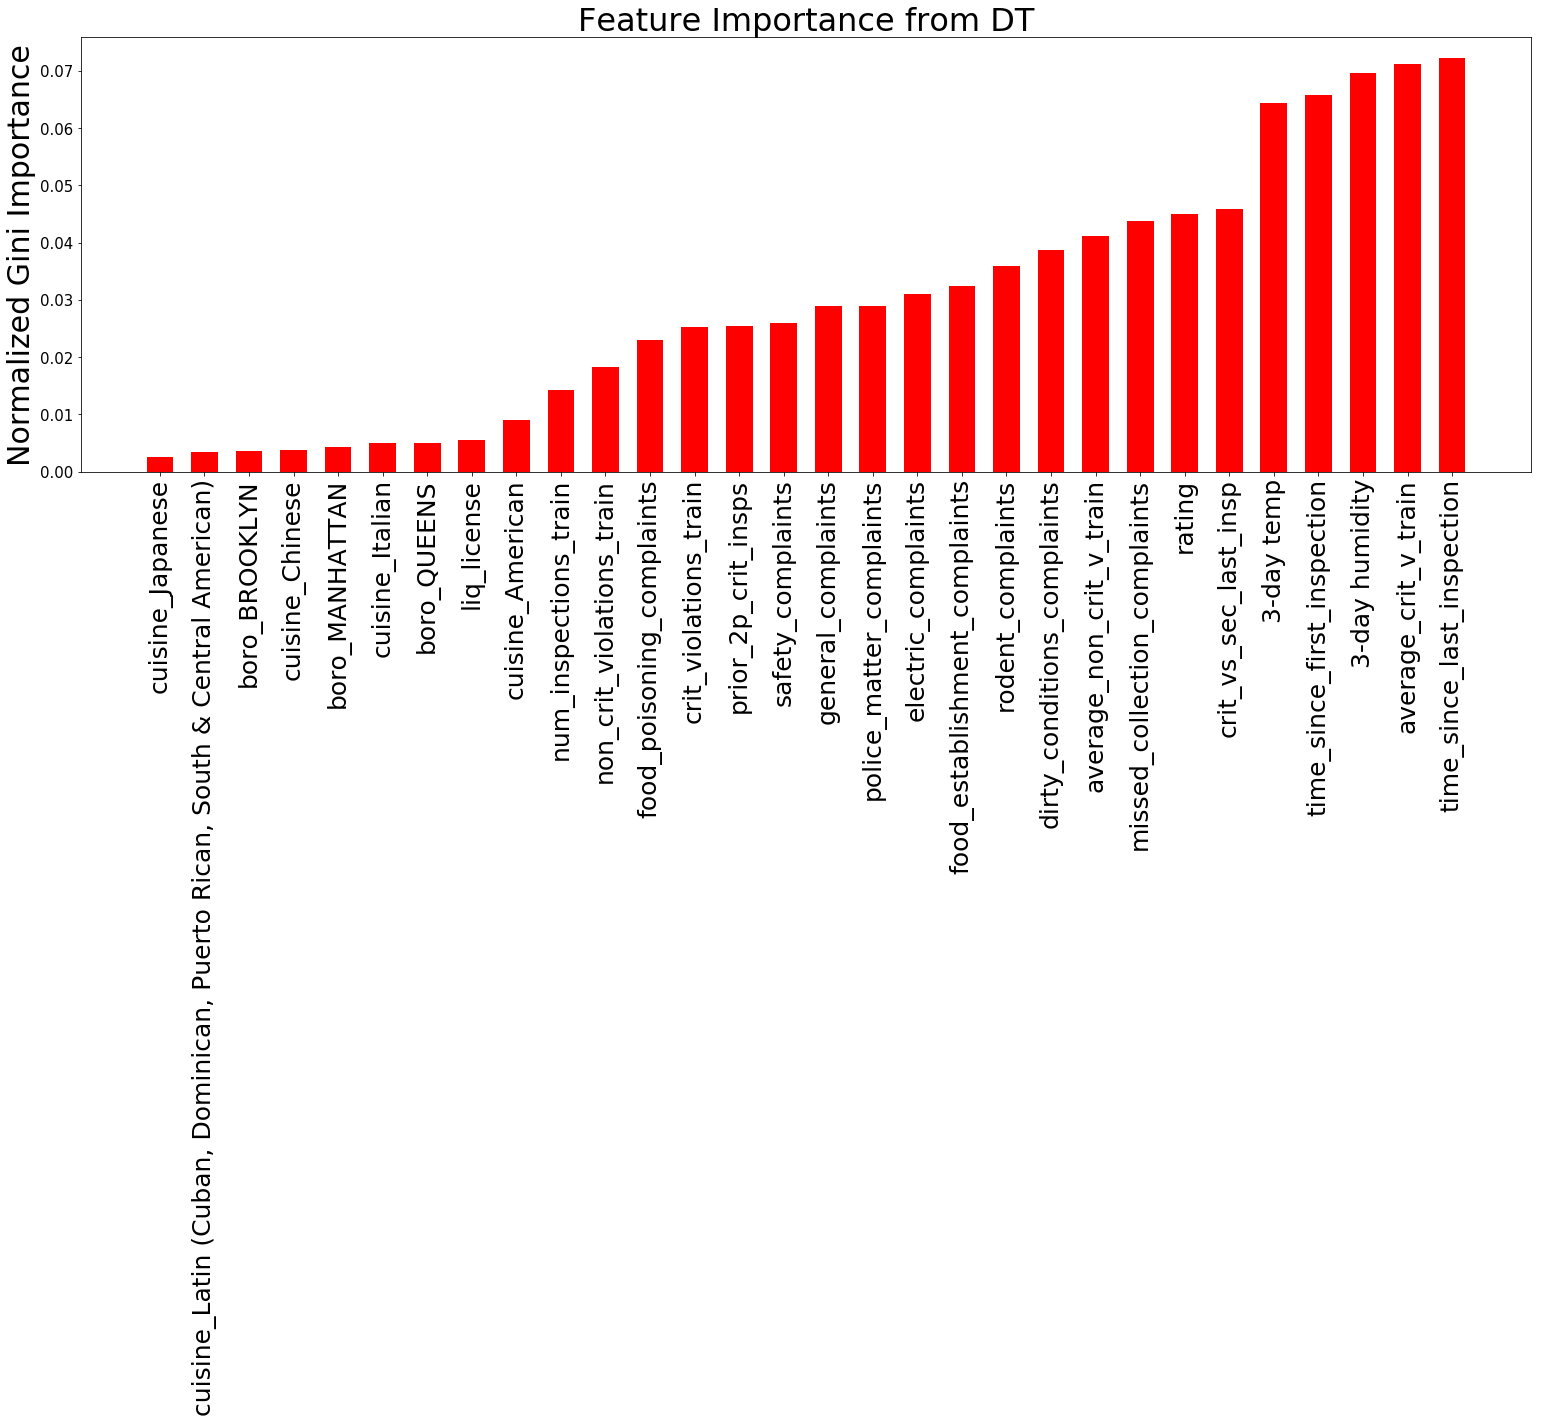

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline


#Explicitly pull out the data we need
newdf = pd.DataFrame({'imp':tree.feature_importances_, 'feat':X_train_norm.columns.values})
newdf = newdf.sort(columns = 'imp', axis = 0)
 
fig, ax = plt.subplots(figsize=(26,8)) 

width=0.6
ax.bar(np.arange(len(newdf[-30:].imp.values)), newdf[-30:].imp.values, width, color='r')
ax.set_xticks(np.arange(len(newdf[-30:].imp.values)))
ax.set_xticklabels(newdf[-30:].feat.values, rotation=90)
plt.title('Feature Importance from DT',size=32)
ax.set_ylabel('Normalized Gini Importance',size=30) 
plt.rc('xtick', labelsize=25) 
plt.rc('ytick', labelsize=15) 


/Users/motorrecoveryresearchlab/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:19: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


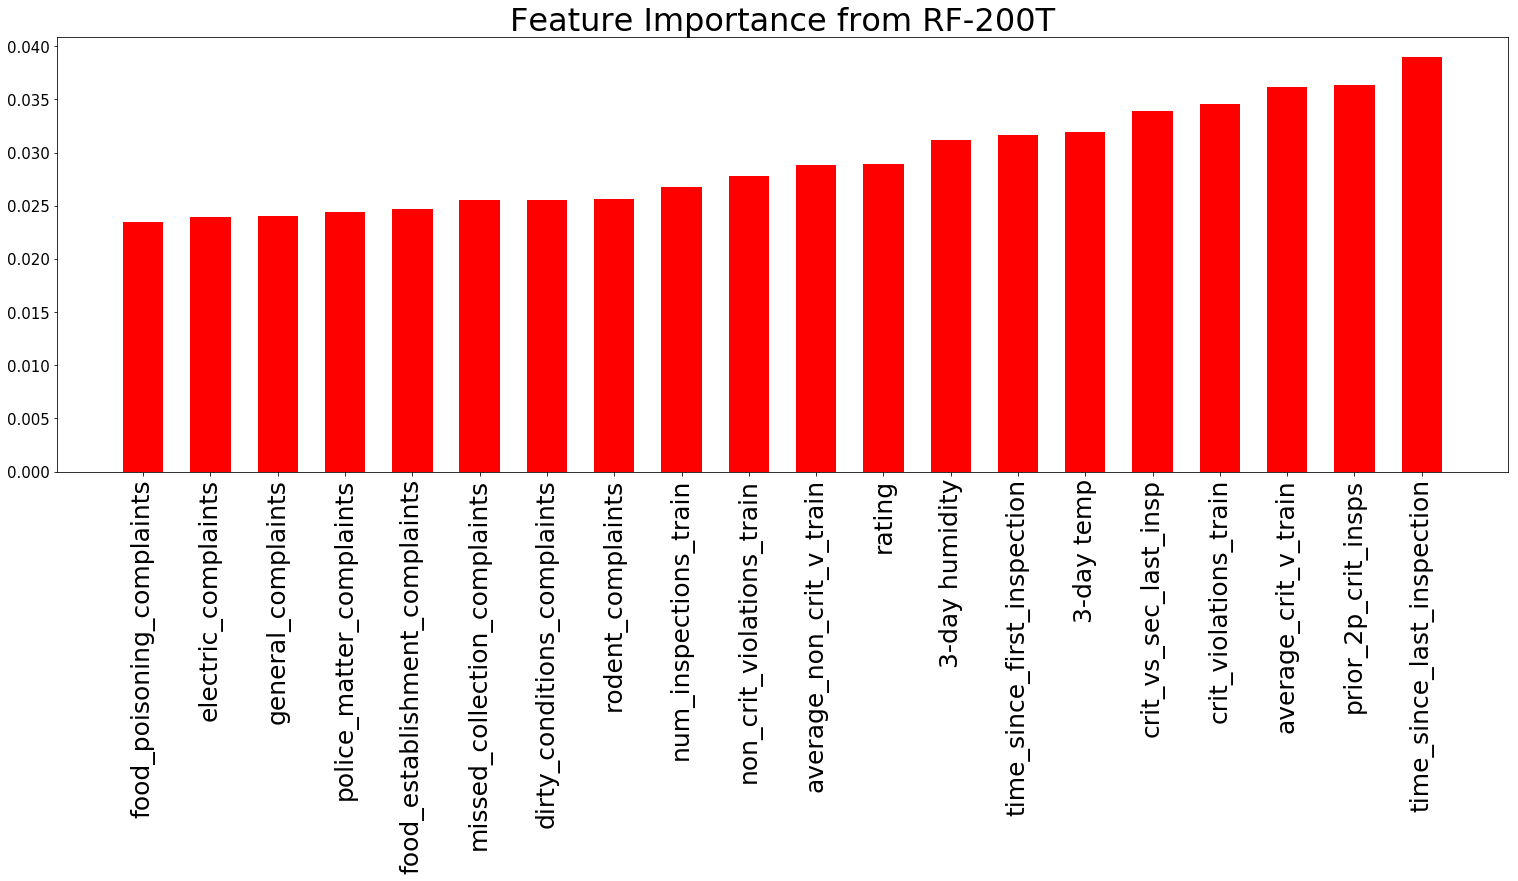

In [25]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier


# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=200,
                              random_state=0)

forest.fit(X_train_norm,y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1] 

newdf = pd.DataFrame({'imp':forest.feature_importances_, 'feat':X_train_norm.columns.values})
newdf = newdf.sort(columns = 'imp', axis = 0)

fig, ax = plt.subplots(figsize=(26,8)) 

width=0.6
ax.bar(np.arange(len(newdf[-20:].imp.values)), newdf[-20:].imp.values, width, color='r')
ax.set_xticks(np.arange(len(newdf[-20:].imp.values)))
ax.set_xticklabels(newdf[-20:].feat.values, rotation=90)
plt.title('Feature Importance from RF-200T',size=32)
#ax.set_ylabel('Normalized Gini Importance',size=30) 
plt.rc('xtick', labelsize=25) 
plt.rc('ytick', labelsize=15) 


/Users/motorrecoveryresearchlab/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:14: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


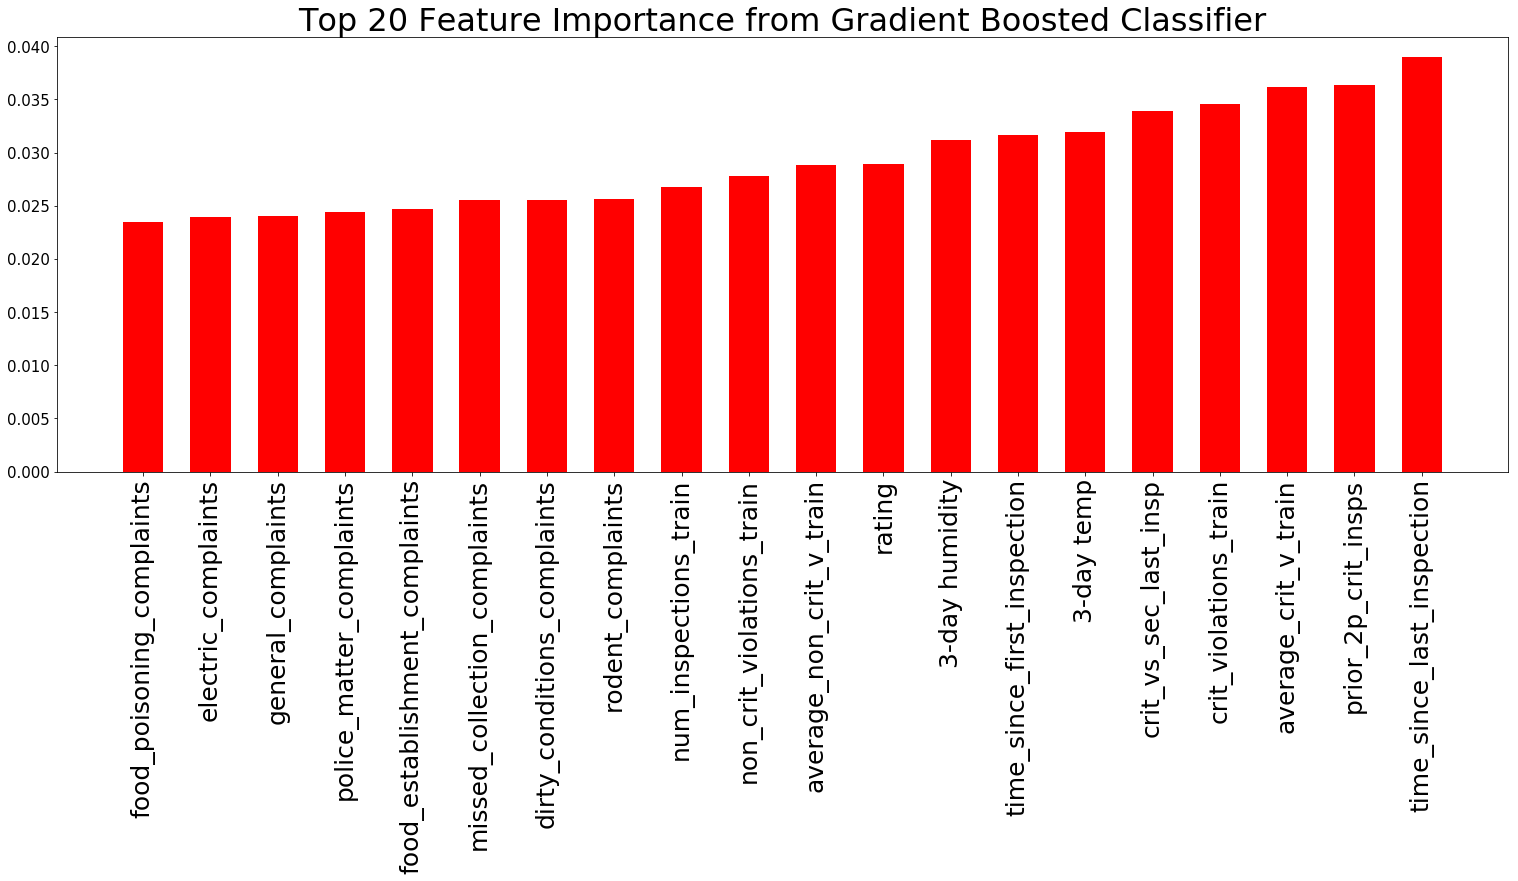

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import ensemble 

gbc = ensemble.GradientBoostingClassifier(subsample=0.4, max_features=None, n_estimators=120)

gbc.fit(X_train_norm,y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1] 

newdf = pd.DataFrame({'imp':forest.feature_importances_, 'feat':X_train_norm.columns.values})
newdf = newdf.sort(columns = 'imp', axis = 0)

fig, ax = plt.subplots(figsize=(26,8)) 

width=0.6
ax.bar(np.arange(len(newdf[-20:].imp.values)), newdf[-20:].imp.values, width, color='r')
ax.set_xticks(np.arange(len(newdf[-20:].imp.values)))
ax.set_xticklabels(newdf[-20:].feat.values, rotation=90)
plt.title('Top 20 Feature Importance from Gradient Boosted Classifier',size=32)
#ax.set_ylabel('Normalized Gini Importance',size=30) 
plt.rc('xtick', labelsize=25) 
plt.rc('ytick', labelsize=15)